#Trabalho Prático 1

##Exercicio a)


I)

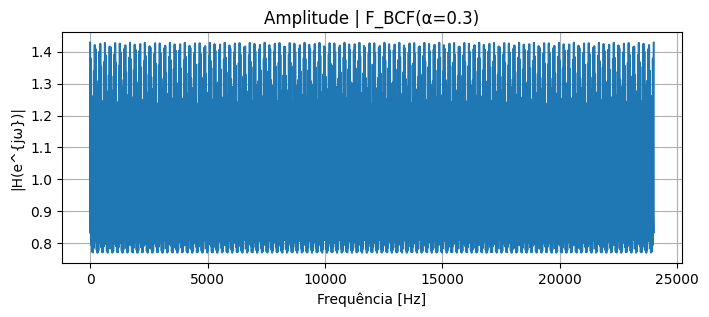

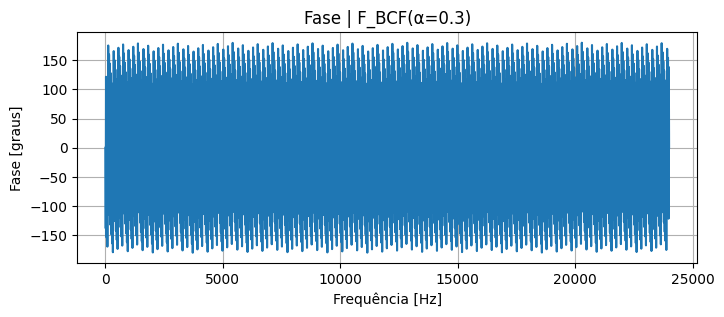

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


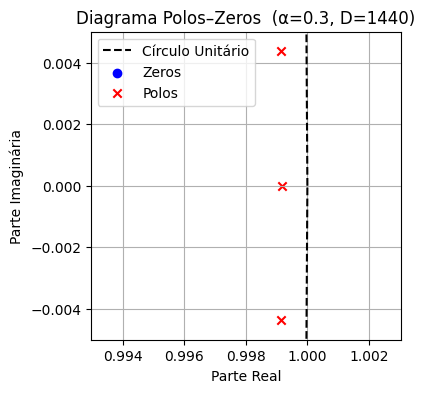

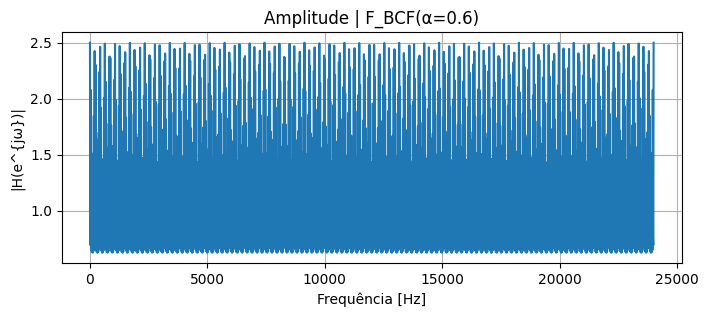

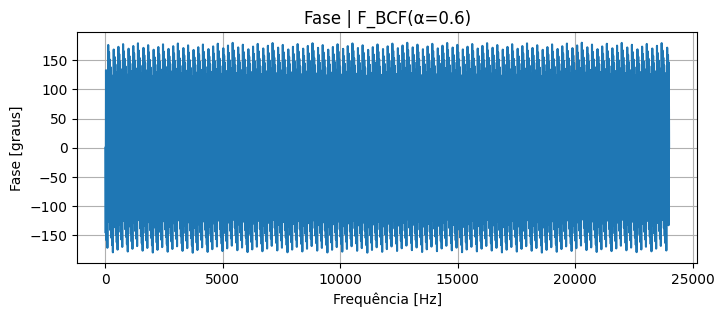

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


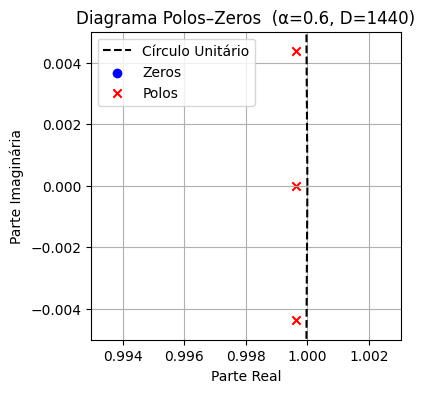

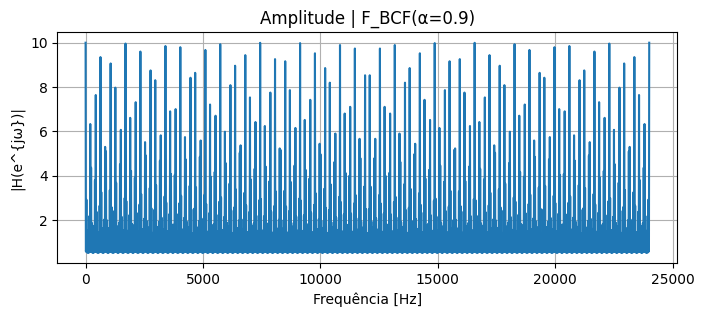

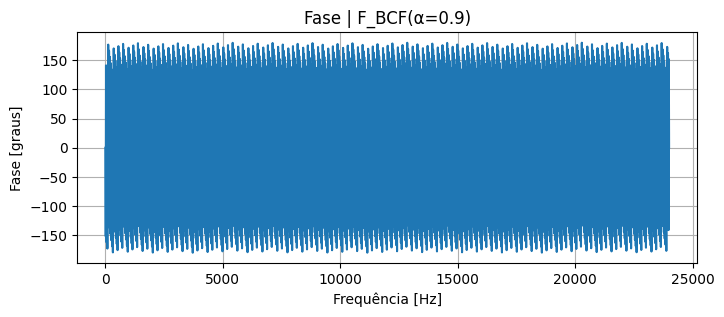

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


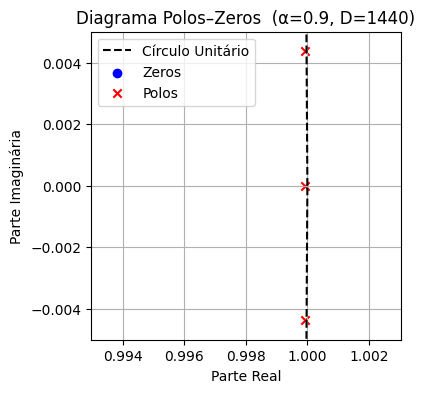

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Feedback Comb Filter
# F_BCF(α, D_c) = z^{-D_c} / (1 - α z^{-D_c})
# ==============================

# --- Parâmetros ---
fs = 48000          # frequência de amostragem [Hz]
delay_ms = 30       # atraso (milissegundos)
D = int(round(delay_ms * fs / 1000))  # atraso em amostras

# Conjunto de ganhos a analisar separadamente
alpha_list = [0.3, 0.6, 0.9]

# Grelha de frequências
N = 2048
w = np.linspace(0, np.pi, N)
f = w * fs / (2 * np.pi)

# --- Função para calcular polos e zeros ---
def poles_zeros(alpha, D):
    # Zeros: D zeros na origem
    zeros = np.zeros(D, dtype=complex)
    # Polos: soluções de z^D = α
    r = np.abs(alpha)**(1/D)
    angles = 2 * np.pi * np.arange(D) / D
    poles = r * np.exp(1j * angles)
    return zeros, poles

# --- Loop principal ---
for alpha in alpha_list:
    # Função de transferência no domínio da frequência
    ejwD = np.exp(-1j * w * D)
    H = ejwD / (1 - alpha * ejwD)

    # Resposta em amplitude e fase
    H_abs = np.abs(H)
    H_ang = np.angle(H) * 180 / np.pi

    # ---------- Gráfico de amplitude ----------
    plt.figure(figsize=(8, 3))
    plt.plot(f, H_abs)
    plt.title(f"Amplitude | F_BCF(α={alpha})")
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("|H(e^{jω})|")
    plt.grid(True)
    plt.show()

    # ---------- Gráfico de fase ----------
    plt.figure(figsize=(8, 3))
    plt.plot(f, H_ang)
    plt.title(f"Fase | F_BCF(α={alpha})")
    plt.xlabel("Frequência [Hz]")
    plt.ylabel("Fase [graus]")
    plt.grid(True)
    plt.show()

    # ---------- Diagrama Polos–Zeros ----------
    z, p = poles_zeros(alpha, D)
    plt.figure(figsize=(4, 4))
    theta = np.linspace(0, 2*np.pi, 512)
    plt.plot(np.cos(theta), np.sin(theta), 'k--', label='Círculo Unitário')
    plt.scatter(np.real(z), np.imag(z), marker='o', color='b', label='Zeros')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Polos')
    plt.axis('equal')
    plt.xlabel("Parte Real")
    plt.ylabel("Parte Imaginária")
    plt.title(f"Diagrama Polos–Zeros  (α={alpha}, D={D})")
    plt.legend()
    plt.grid(True)
    plt.xlim(0.995, 1.001)
    plt.ylim(-0.005, 0.005)
    plt.show()


II)

fs=44100 Hz | D=1323 amostras (~30 ms) | duração=5.25s
guardado: audio_FBCF_alpha0.3_D1323_fs44100_stereo_Ldry_Rwet.wav


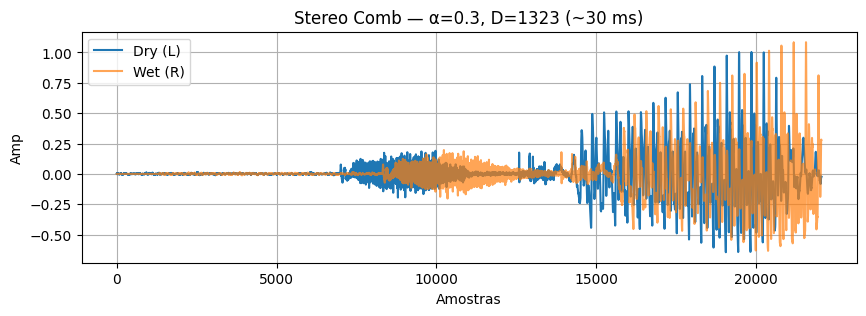

guardado: audio_FBCF_alpha0.6_D1323_fs44100_stereo_Ldry_Rwet.wav


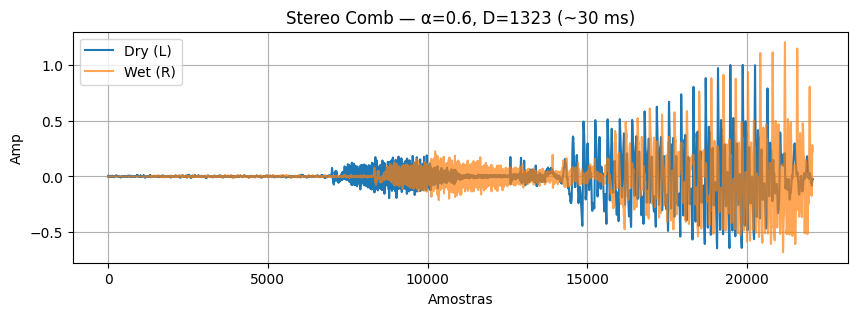

guardado: audio_FBCF_alpha0.9_D1323_fs44100_stereo_Ldry_Rwet.wav


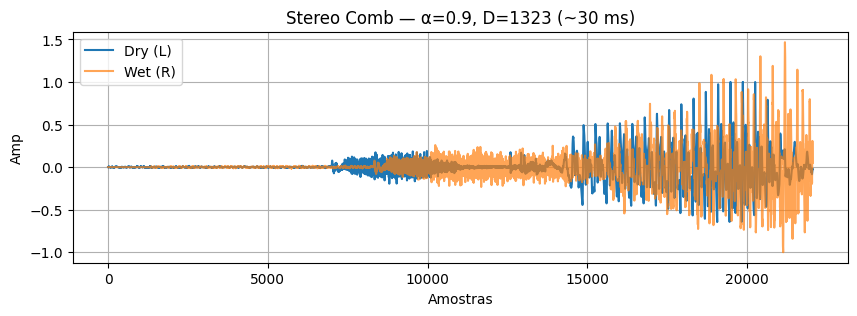

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import soundfile as sf

# ==============================
# Stereo export: L = dry, R = wet (FBCF)
# H(z) = z^{-D} / (1 - α z^{-D})
# y[n] - α y[n-D] = x[n-D]
# ==============================

audio_in = "audio.wav"
delay_ms = 30
alphas = [0.3, 0.6, 0.9]   # vamos gerar 3 ficheiros, um por α

# --- Ler áudio ---
x, fs = sf.read(audio_in)
if x.ndim > 1:
    x = x[:, 0]  # usa canal esquerdo
x = x.astype(np.float32)

# --- Atraso em amostras ---
D = int(round(delay_ms * fs / 1000))
print(f"fs={fs} Hz | D={D} amostras (~{delay_ms} ms) | duração={len(x)/fs:.2f}s")

for alpha in alphas:
    # Coeficientes do FBCF
    b = np.hstack([np.zeros(D), [1.0]]).astype(np.float32)            # z^{-D}
    A = np.hstack([[1.0], np.zeros(D-1), [-alpha]]).astype(np.float32) # 1 - α z^{-D}

    # Aplicar filtro ao áudio
    y = lfilter(b, A, x)

    # Estéreo: L=dry, R=wet
    mix = np.stack([x, y], axis=1)


    # Guardar
    fname = f"audio_FBCF_alpha{alpha}_D{D}_fs{fs}_stereo_Ldry_Rwet.wav"
    sf.write(fname, mix.astype(np.float32), fs)
    print("guardado:", fname)

    # (Opcional) visualizar primeiros 0.5 s
    show = int(0.5 * fs)
    plt.figure(figsize=(10,3))
    plt.plot(mix[:show,0], label="Dry (L)")
    plt.plot(mix[:show,1], label="Wet (R)", alpha=0.7)
    plt.title(f"Stereo Comb — α={alpha}, D={D} (~{delay_ms} ms)")
    plt.xlabel("Amostras"); plt.ylabel("Amp"); plt.legend(); plt.grid(True)
    plt.show()
